In [3]:
#Sale Predictions of Food Items
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
sales_data = '/content/sales_predictions.csv'  #source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
df = pd.read_csv(sales_data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.shape #1 (#rows, #columns)

(8523, 12)

In [6]:
df.dtypes #2 data types of each variable

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#3 Are there any duplicates? no
df.duplicated().sum() #look for duplicated rows and total the number of duplicates

0

In [8]:
#4 Are there any missing values? yes
df.isna().sum() #Total number of missing values in each column


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.isna().any()[lambda x: x] 

Item_Weight    True
Outlet_Size    True
dtype: bool

In [10]:
df.loc[df.isnull().any(axis=1)] #locate rows with missing values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [11]:
df_nullWeights= df.loc[df['Item_Weight'].isnull()] #locate rows where Item_Weights are missing
df_nullWeights

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [12]:
df.groupby(['Item_Type'])[['Item_Weight']].mean() #look at average weight of each Item_Type group

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [13]:
df["Item_Weight"] = df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean())) #5 Fill in missing values in the Item_Weight column by taking the mean of the Item_Type groups and filling them in to each corresponding missing Item_Weight
df.head(8) #I chose to fill in missing weights with average weight of each Item_Type group because similar food types tend to have relatively close weights

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [14]:
df.isna().sum() #check for missing values in Item_Weight


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
df[['Outlet_Type', 'Outlet_Size']]

,Outlet_Type,Outlet_Size
0,Supermarket Type1,Medium
1,Supermarket Type2,Medium
2,Supermarket Type1,Medium
3,Grocery Store,NaN
4,Supermarket Type1,High
...,...,...
8518,Supermarket Type1,High
8519,Supermarket Type1,NaN
8520,Supermarket Type1,Small
8521,Supermarket Type2,Medium


In [16]:
#I chose to not adjust for missing outlet sizes depending on whether this column will be needed in the future.
#If it was the real world, it might be possible to circle back and get the missing data.

In [17]:
#7 find and fix any inconsistent categories of data
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
#Create consistent groups in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [20]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [21]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [22]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [23]:
#8 For any numerical columns, obtain the summary statistics of each (min, max, mean)
df[["Item_Weight", "Item_Visibility", 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].min()



Item_Weight                     4.555
Item_Visibility                 0.000
Item_MRP                       31.290
Outlet_Establishment_Year    1985.000
Item_Outlet_Sales              33.290
dtype: float64

In [24]:
df[["Item_Weight", "Item_Visibility", 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].max()



Item_Weight                     21.350000
Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
dtype: float64

In [25]:
df[["Item_Weight", "Item_Visibility", 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].mean()


Item_Weight                    12.857890
Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
dtype: float64

In [26]:
df[["Item_Weight", "Item_Visibility", 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']].describe()
#alternate method for finding statistics on multiple columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857890,0.066132,140.992782,1997.831867,2181.288914
std,4.232804,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.867061,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Part 3:

In [27]:
s = df['Item_Type'].value_counts()
s.head()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

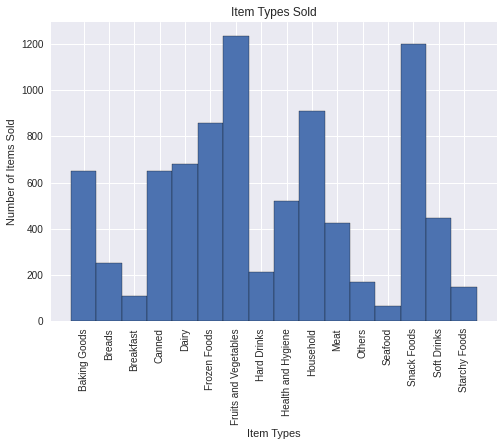

In [28]:
plt.style.use('seaborn')

plt.title('Item Types Sold')
plt.xlabel('Item Types')
plt.xticks(rotation=90)
plt.ylabel('Number of Items Sold')
sorted_items = df['Item_Type'].sort_values()
sorted_items.hist(bins = range(17), edgecolor = 'black', align = 'left');


In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

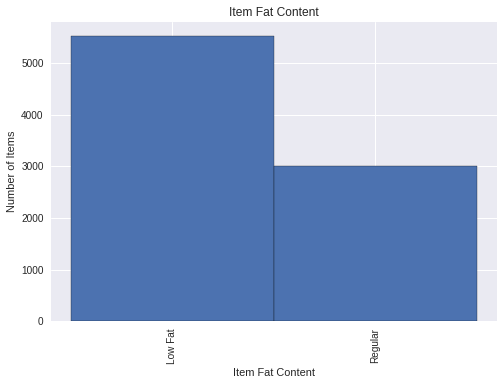

In [30]:
plt.style.use('seaborn')

plt.title('Item Fat Content')
plt.xlabel('Item Fat Content')
plt.xticks(rotation=90)
plt.ylabel('Number of Items')

df['Item_Fat_Content'].hist(bins = range(3), edgecolor = 'black', align = 'left');


Text(0, 0.5, 'Item Outlet Sales')

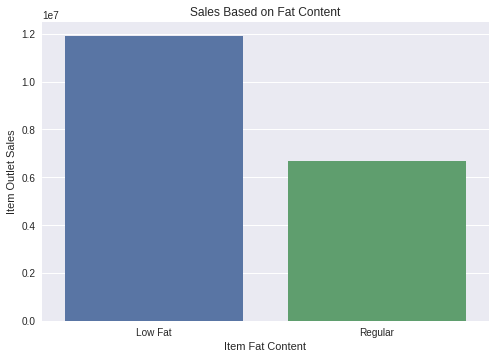

In [31]:
plt.style.use('seaborn')


fatContent_sales = df.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum().reset_index()
sns.barplot(data = fatContent_sales, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');
plt.title('Sales Based on Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')


Text(0.5, 1.0, 'Sales per Item Type')

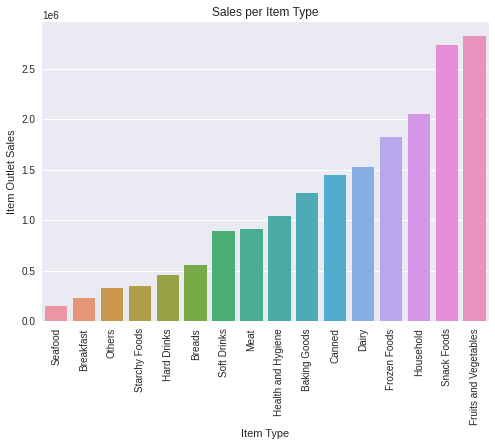

In [32]:
salesBy_type = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum().reset_index()
salesBy_type = salesBy_type.sort_values(by = ['Item_Outlet_Sales'])
sns.barplot(data = salesBy_type, x = 'Item_Type', y = 'Item_Outlet_Sales');

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Sales per Item Type')

Text(0.5, 1.0, 'Sales per Outlet Type')

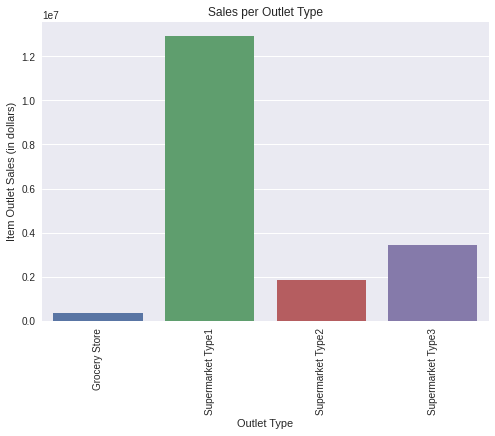

In [33]:
outlet_sales = df.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum().reset_index()
sns.barplot(data = outlet_sales, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

plt.xticks(rotation = 90)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales (in dollars)')
plt.title('Sales per Outlet Type')

Text(0.5, 1.0, 'Sales per Item Type at all Supermarket Type1 Locations')

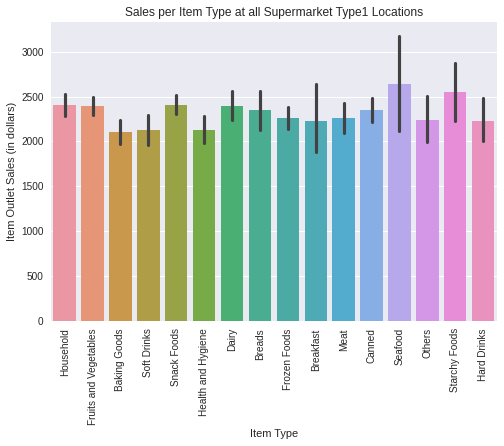

In [34]:
smkt_1 = df['Outlet_Type']=='Supermarket Type1'
market1_filter = df.loc[smkt_1,:]
market1_filter = market1_filter.sort_values(by = 'Item_Outlet_Sales')

sns.barplot(data = market1_filter, x = 'Item_Type', y = 'Item_Outlet_Sales');

plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales (in dollars)')
plt.title('Sales per Item Type at all Supermarket Type1 Locations')

Text(0.5, 1.0, 'Sales per Outlet Location')

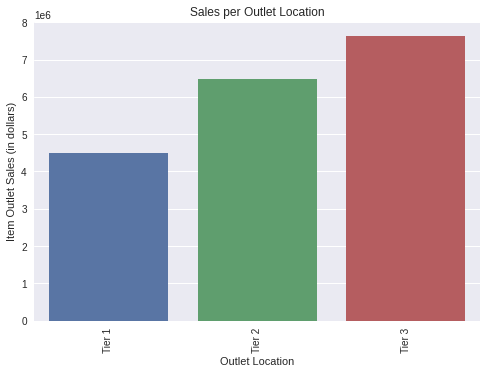

In [35]:
location_sales = df.groupby(['Outlet_Location_Type'])[['Item_Outlet_Sales']].sum().reset_index()
sns.barplot(data = location_sales, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');
plt.xticks(rotation = 90)

plt.xlabel('Outlet Location')
plt.ylabel('Item Outlet Sales (in dollars)')
plt.title('Sales per Outlet Location')


Text(0.5, 1.0, 'Item Visibility vs. Item Outlet Sales')

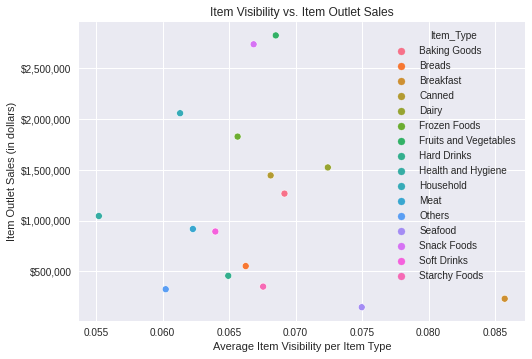

In [36]:
type_visibility = df.groupby(['Item_Type'])[['Item_Visibility']].mean()
type_sales = df.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
visibility_sales = pd.concat([type_visibility.Item_Visibility, type_sales.Item_Outlet_Sales], axis =1 )
scatter = sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = visibility_sales, hue = 'Item_Type');

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
scatter.yaxis.set_major_formatter(tick)

plt.xlabel('Average Item Visibility per Item Type')
plt.ylabel('Item Outlet Sales (in dollars)')
plt.title('Item Visibility vs. Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

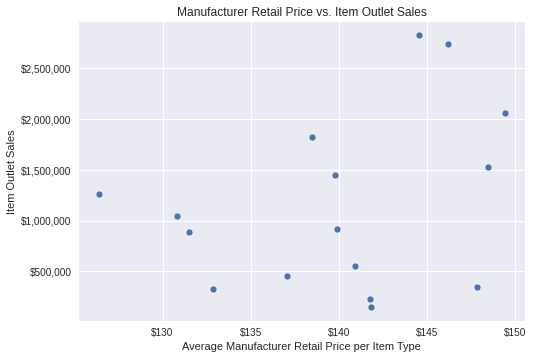

In [37]:
MRP_type = df.groupby(['Item_Type'])[["Item_MRP"]].mean()
MRP_sales = pd.concat([type_sales.Item_Outlet_Sales, MRP_type.Item_MRP], axis = 1)
scatter = sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = MRP_sales)
scatter

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
scatter.yaxis.set_major_formatter(tick)
scatter.xaxis.set_major_formatter(tick)

plt.title('Manufacturer Retail Price vs. Item Outlet Sales')
plt.xlabel('Average Manufacturer Retail Price per Item Type')
plt.ylabel('Item Outlet Sales')

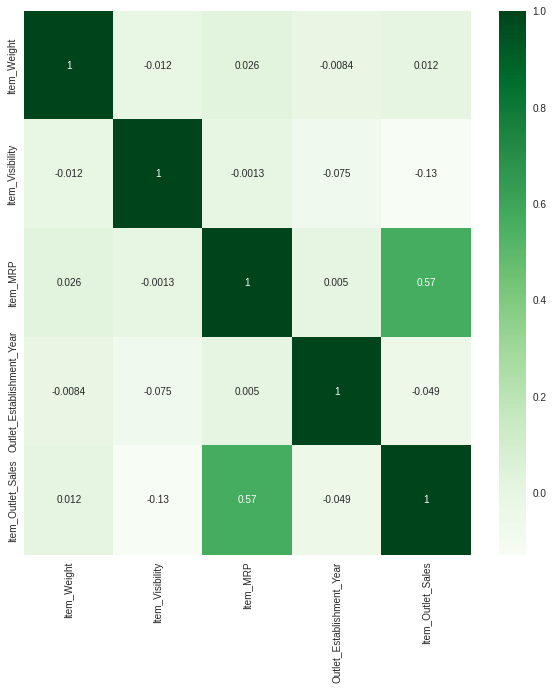

In [38]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, cmap = 'Greens' , annot = True)

In [66]:
t1_filter = df['Outlet_Type']== 'Supermarket Type1'
t2_filter = df['Outlet_Type']== 'Supermarket Type2'
t3_filter = df['Outlet_Type']== 'Supermarket Type3'

t1_df = df.loc[t1_filter]
t2_df = df.loc[t2_filter]
t3_df = df.loc[t3_filter]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Item Outlet Sales at Each Supermarket Type')

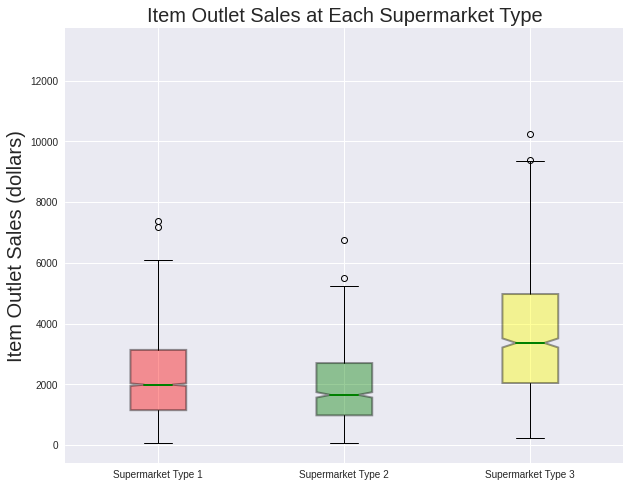

In [89]:

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8)) #Creates subplots out of the two boxplots



boxplots = axes.boxplot([t1_df['Item_Outlet_Sales'], t2_df['Item_Outlet_Sales'], t3_df['Item_Outlet_Sales']], notch = True,
           labels = ['Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3'], 
           patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black',  facecolor = 'yellow', alpha = .4));

fliers = boxplots['fliers'] #list of fliers outside boxplot

for fly in fliers: #pick out minimum and maximum flier data points and plot on graph
    fdata = fly.get_data()
    fly.set_data([fdata[0][0],fdata[0][-1]],[fdata[1][0],fdata[1][-1]])


boxplot1 = boxplots['boxes'][0] #save the location of the first boxplot on the left to a variable boxplot1
boxplot2 = boxplots['boxes'][1]

boxplot1.set_facecolor('red') #color boxplot1 red
boxplot2.set_facecolor('green') #color boxplot2 green
plt.ylabel('Item Outlet Sales (dollars)', fontsize = 20);
plt.title('Item Outlet Sales at Each Supermarket Type', fontsize = 20)



These are boxplots showing the distribution of sales for product categories at each of the three types of Supermarkets. Type 3 Supermarkets had the highest median and maximum sales for all of the product categories.  Type 2 Supermarkets ranked as the lowest for median, maximum and range of sales and Type 1 Supermarkets ranked slightly above Type 3 in each of those three categories.